<div class="alert alert-info"> <b>Summary:</b>
    The goal of this project was to analyze the data received from Instacart and share the findings from what is learned.
    The initial phase of the project involved pre-processing the data, where the initial data impression is obtained and cleaned up. This was done by identifying and addressing duplicate and missing values and their context, which in turn allowed for determining their relevance to the data. 
    The second part features data analysis through the use of descriptive statistical methods. 
    The project’s current progress status is: complete.
    For a summary of findings, please see the end of page.</div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# reading files with the ';' as the delimiter
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
depts = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# obtaining an initial impression of the data with info() and sample()
# print() and "___" used for formatting output for easier read

# instacart_orders.csv
print("INSTACART_ORDERS.CSV: info():"), print()
orders.info(), print()
print("_________________________"), print()
print("INSTACART_ORDERS.CSV: sample()"), print()
display(orders.sample(5, random_state=111)), print()
print("_________________________")

INSTACART_ORDERS.CSV: info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

_________________________

INSTACART_ORDERS.CSV: sample()



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
114929,357483,14901,29,4,10,15.0
339025,897752,33607,10,5,0,11.0
355452,2698167,53621,51,1,10,4.0
236299,3131627,150547,11,0,15,8.0
346667,2872619,39767,3,5,15,30.0



_________________________


<b>instacart_orders.csv: Initial impression</b>

This file has a total of 478,967 rows and 6 columns of data. Each row of data corresponds to one order on the Instacart app. Each column name and its associated information are as follows:

* <b>'order_id'</b>: a categorical variable. Holds the ID number that uniquely identifies each order. Is an <b>int</b> type.

* <b>'user_id'</b>: a categorical variable. Has an ID number that uniquely identifies each customer account. Is an <b>int</b> type.

* <b>'order_number'</b>: a quantitative variable. Holds the number of times this customer has placed an order. Is an <b>int</b> type.

* <b>'order_dow'</b>: a quantitative variable. Holds the day of the week (dow) that the order was placed (which day is 0 is uncertain, for the purpose of analysis: Day 0 = Sunday, day 6 = Saturday). Is an <b>int</b> type.

* <b>'order_hour_of_day'</b>: a quantitative variable. Holds the hour of the day (hod) that the order was placed. Is an <b>int</b> type.

* <b>'days_since_prior_order'</b>: a quantitative variable. The number of days since this customer placed their previous order. Is a <b>float</b> type.

Column <b>'days_since_prior_order'</b>: has a total of 28, 819 null/missing values. 

In [4]:
# products.csv
print("PRODUCTS.CSV: info():"), print()
products.info(), print()
print("_________________________"), print()
print("PRODUCTS.CSV: sample():"), print()
display(products.sample(5, random_state=111)), print()
print("_________________________")
print()
products.isna().sum()

PRODUCTS.CSV: info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

_________________________

PRODUCTS.CSV: sample():



,product_id,product_name,aisle_id,department_id
22912,22913,Borscht with Diced Beets,33,6
30350,30351,Barbera D' Alba,28,5
26789,26790,Organic AppleApple,99,15
5499,5500,Blended Juice Beverage- Mango Orange,113,1
35807,35808,Nourish + Shine Shampoo Hair Care,22,11



_________________________



product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

<b>products.csv: Initial impression</b>

This file has a total of 49,694 rows and 4 columns of data. 

Each row corresponds to a unique product that customers can buy. Each column name and its associated information are as follows:

* <b>'product_id'</b>: a categorical variable. Holds the ID number that uniquely identifies each product. Is an <b>int</b> type.

* <b>'product_name':</b>: a categorical variable. Holds the name of the product. Is an <b>object</b> type.

* <b>'aisle_id'</b>: a categorical variable. Holds the ID number that uniquely identifies each grocery aisle category. Is an <b>int</b> type.

* <b>'department_id'</b>: a categorical variable. Holds the ID number that uniquely identifies each grocery department category. Is an <b>int</b> type.

Column <b>'product_name'</b>: has a total of 1, 258 null/missing values. 

In [5]:
# aisles.csv
print("AISLES.CSV: info():"), print()
aisles.info(), print()
print("_________________________"), print()
print("AISLES.CSV: sample():"), print()
display(aisles.sample(5, random_state=111)), print()
print("_________________________")
print()

AISLES.CSV: info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

_________________________

AISLES.CSV: sample():



,aisle_id,aisle
129,130,hot cereal pancake mixes
48,49,packaged poultry
90,91,soy lactosefree
93,94,tea
133,134,specialty wines champagnes



_________________________



<b>aisles.csv: Initial impression</b>

This file has a total of 134 rows and 2 columns of data. 

Each row corresponds to an aisle name and number. Each column name and its associated information are as follows:

* <b>'aisle_id'</b>: a categorical variable. Holds the ID number that uniquely identifies each grocery aisle category. Is an <b>int</b> type.

* <b>’aisle'</b>: a categorical variable. Holds the name of the aisle. Is an <b>object</b> type.


In [6]:
# departments.csv
print("DEPARTMENTS.CSV: info():"), print()
depts.info(), print()
print("_________________________"), print()
print("DEPARTMENTS.CSV: sample():"), print()
display(depts.sample(5, random_state=111)), print()
print("_________________________")
print()

DEPARTMENTS.CSV: info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

_________________________

DEPARTMENTS.CSV: sample():



,department_id,department
3,4,produce
5,6,international
13,14,breakfast
11,12,meat seafood
14,15,canned goods



_________________________



<b>departments.csv: Initial impression</b>

This file has a total of 21 rows and 2 columns of data. 

Each row corresponds to a department name and number. Each column name and its associated information are as follows:

* <b>'department_id'</b>: a categorical variable. Holds the  ID number that uniquely identifies each grocery department category. Is an <b>int</b> type.

* <b>’department'</b>: a categorical variable. Holds the name of the department. Is an <b>object</b> type.


In [7]:
# order_products.csv
print("ORDER_PRODUCTS.CSV: info():"), print()
order_products.info(show_counts=True), print()
print("_________________________"), print()
print("ORDER_PRODUCTS.CSV: sample():"), print()
display(order_products.sample(5, random_state=111))
print()

ORDER_PRODUCTS.CSV: info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

_________________________

ORDER_PRODUCTS.CSV: sample():



,order_id,product_id,add_to_cart_order,reordered
1723270,409034,28132,5.0,1
1833883,460225,32227,3.0,1
979716,405475,24631,7.0,1
1638886,1982115,48373,2.0,0
3852111,2111594,48017,9.0,0


<b>order_products.csv: Initial impression</b>

This file has a total of 4,545,007 and 4 columns of data. 

Each row corresponds to one item placed in an order. Each column name and associated information are as follows:

* <b>'order_id'</b>: a categorical variable. Holds an ID number that uniquely identifies each order. Is an <b>int</b> type.

* <b>'product_id'</b>: a categorical variable. Holds the ID number that uniquely identifies each product. Is an <b>int</b> type.

* <b>'add_to_cart_order'</b>: a categorical variable. Holds the sequential order in which each item was placed in the cart. Is a <b>float</b> type.

* <b>'reordered'</b>: a categorical variable. Holds whether the customer has ever purchased the product before. 0 if they customer haven’t, 1 if they have. Is an <b>int</b> type.


Column <b>'add_to_cart_order'</b>: has a total of 836 null/missing values. 


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
## Check for duplicated orders

# using duplicated() and sum() method to calculate the number of duplicate values
print("Number of duplicate rows in 'orders' DataFrame:   ", orders.duplicated().sum()), print()

# saving actual duplicate values from original df to variable and displaying to see what the data looks like
dupes = orders[orders.duplicated()]

print("Duplicate values in original df:   ")
display(dupes)

Number of duplicate rows in 'orders' DataFrame:    15

Duplicate values in original df:   


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


<b>1.1 ‘orders’ DataFrame</b>

<b>Task: check for duplicated orders</b>

There are a total of 15 duplicate rows in the ‘orders’ DataFrame which also happens to feature a couple of the NaN values from the ‘days_since_prior_order’ column. 

To see a chart of all 15 values, see the output above. 


In [9]:
## Check for all orders placed Wednesday at 2:00 AM

# assuming 0 = Sunday, Wednesday = 3
# applying filtering mask for all orders placed at Wed @ 2am
orders_wed_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

# checking for duplicated values specific to Wed @ 2am
print("Number of duplicate values specific to Wed @ 2am:   ", orders_wed_2am.duplicated().sum())

# viewing the duplicated values specific to Wed @ 2am
display(orders_wed_2am[orders_wed_2am.duplicated()])

# searching for order_id from orders placed on wed @ 2am in the dupes dataframe to cross check
display(dupes.query("order_id in @orders_wed_2am['order_id']"))

# seeing if any value from orders placed on wed @ 2am is NOT in the dupes dataframe 
# to confirm that all dupes are for wed @ 2am
display(dupes.query("order_id not in @orders_wed_2am['order_id']"))

Number of duplicate values specific to Wed @ 2am:    15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


<b>1.1 ‘orders’ DataFrame</b>

<b>Task: Check for all orders placed Wednesday at 2:00 AM</b>

All orders placed on Wednesday at 2 AM are also all 15 of the duplicate values found in the previous section.


In [10]:
## Remove duplicate orders

# Given that all the values pertain to Wednesday at 2 am, and only 15 duplicate rows out of the 478k+ rows, 
# it is safe to drop these duplicates

orders = orders.drop_duplicates().reset_index(drop=True)

<b>1.1 ‘orders’ DataFrame</b>

<b>Task: Remove duplicate orders</b>

Since all the duplicate values are specific to Wednesday at 2 AM, and there are only 15 duplicate rows out of the 478k+ rows, it is safe to drop these duplicates


In [11]:
## Double check for duplicate rows

# number of duplicate values
print(orders.duplicated().sum())

0


<b>1.1 ‘orders’ DataFrame</b>

<b>Task: Double-check for duplicate rows</b>


Confirmed: there are no duplicate rows remaining in the </b>‘orders’</b> DataFrame



In [12]:
## Double check for duplicate order IDs only
print(orders['order_id'].duplicated().sum())

0


<b>1.1 ‘orders’ DataFrame</b>

<b>Task: Double-check for duplicate order IDs only</b>

Confirmed: there are no duplicate rows remaining in the ‘order_id’ column of the ‘orders’ DataFrame

### `products` data frame

In [13]:
## Check for fully duplicate rows

# number of duplicate values
print(products.duplicated().sum())

0


<b>1.2  products DataFrame</b>

<b>Task: Check for fully duplicate rows</b>

There are no fully duplicate rows in the products DataFrame.


In [14]:
## Check for just duplicate product IDs
print(products['product_id'].duplicated().sum())

0


<b>1.2  products DataFrame</b>

<b>ask: Check for just duplicate product IDs</b>

There are no duplicate rows in the ‘product_ID’ column in the DataFrame.


In [15]:
## Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()

# number of duplicated values in the product_name column
print(products['product_name'].duplicated().sum())
print()

# duplicated values in the product_name column
display(products[products['product_name'].duplicated()])

1361



,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


<b>1.2  products DataFrame</b>

<b>Task: Check for just duplicate product names (convert names to lowercase to compare better)</b>

After converting all strings to lowercase for a better comparison, there are 1, 361 values in the <b>‘product_name’</b>column of DataFrame. For an excerpt on the output of said values and their associated rows, see output above.

In [16]:
## Check for duplicate product names that aren't missing

# assign all duplicate values to variable
dup_prod_name = products[products['product_name'].duplicated()]

# assign all non-null values to variable
dup_prod_name = dup_prod_name[~dup_prod_name['product_name'].isna()]

display(dup_prod_name)

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


<b>1.2  products DataFrame</b>

<b>Task: Check for duplicate product names that aren't missing</b>

Of the duplicate product names, 104 rows are free of missing values. 


### `departments` data frame

In [17]:
## Check for fully duplicate rows

# number of duplicate values
print(depts.duplicated().sum())

0


<b>1.3  departments DataFrame</b>

<b> Task: Check for fully duplicate rows</b>

There are no fully duplicate rows in the <b>departments</b> DataFrame

In [18]:
# Check for just duplicate department IDs
print(depts['department_id'].duplicated().sum()), print()

# Check for just duplicate departments (convert names to lowercase for better comparison)
depts['department'] = depts['department'].str.lower()

# number of duplicated values in the 'department' column
print(depts['department'].duplicated().sum())

0

0


<b>1.3  departments DataFrame</b>

<b>Task: Check for just duplicate department IDs</b>

There are no duplicate rows in the <b>‘department_ID’</b> column in the DataFrame

### `aisles` data frame

In [19]:
## Check for fully duplicate rows

# number of obvious duplicate values
print(aisles.duplicated().sum())

0


<b>1.4  aisles DataFrame</b>

<b> Task: Check for fully duplicate rows</b>

There are no fully duplicate rows in the <b>aisles</b> DataFrame

In [20]:
# Check for just duplicate aisle ID
print(aisles['aisle_id'].duplicated().sum()), print()

# Check for just duplicate aisle (convert names to lowercase for better comparison)
aisles['aisle'] = aisles['aisle'].str.lower()

# number of duplicated values in the 'aisle' column
print(aisles['aisle'].duplicated().sum())

0

0


<b>1.4  aisles DataFrame</b>

<b>Task: Check for just duplicate aisle IDs and aisle names</b>

There are no duplicate rows in the <b>‘aisle_ID’</b> and <b>‘aisle’</b>column in the DataFrame

### `order_products` data frame

In [21]:
## Check for fully duplicate rows

# number of obvious duplicate values
print(order_products.duplicated().sum())

0


<b>1.5  order_products DataFrame</b>

<b> Task: Check for fully duplicate rows</b>

There are no fully duplicate rows in the <b>order_products</b> DataFrame

In [22]:
## Double check for any other tricky duplicates
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

<b>1.5 order_products DataFrame</b>

<b>Task: Double-check for any other tricky duplicates</b>

Assuming that repeated cart add of the same product in the same order would go under a separate potential column labeled <b>'quantity'</b>, I decided to see if there were any duplicate row where the <b>order_id</b> and <b>product_id</b> were repeated. 

However, after searching, there are no duplicate rows under just <b>order_id</b> and <b>product_id</b> in the DataFrame

## Find and remove missing values


### `products` data frame

In [23]:
# checking to see which columns have missing values using isna() and sum()
print(products.isna().sum())

# rows with missing values in the 'product_name' column
products[products['product_name'].isna()]

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


<b>2.1 products DataFrame</b>

After checking to see which columns in the <b>products</b> DataFrame has missing values, it was confirmed that there are 1,258 values missing in the <b>'product'</b> column only. For an excerpt of said missing values, see output above.

In [24]:
## Are all of the missing product names associated with aisle ID 100?
print(products[(products['product_name'].isna()) & (products['aisle_id'] == 100)]['aisle_id'].value_counts())

100    1258
Name: aisle_id, dtype: int64


<b>2.1 products DataFrame</b>

<b>Task: Are all of the missing product names associated with aisle ID 100?</b>

Yes, since the <b>'product_name'</b> column has 1,258 rows with missing values and the number of missing product names associated with <b>'aisle ID 100'</b> is also 1,258.

In [25]:
## Are all of the missing product names associated with department ID 21?
print(products[(products['product_name'].isna()) 
               & (products['department_id'] == 21)]['department_id'].value_counts())

21    1258
Name: department_id, dtype: int64


<b>2.1 products DataFrame</b>

<b>Task: Are all of the missing product names associated with department ID 21?</b>

Yes, since the <b>'department_id</b> column has 1,258 rows with missing values and the number of missing product names associated with <b>'department ID 21'</b> is also 1,258.

In [26]:
## What is this ailse and department?

display(aisles[(aisles['aisle_id'] == 100)])
print()
display(depts[(depts['department_id'] == 21)])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


<b>2.1 products DataFrame</b>

<b>Task: What is this aisle and department?</b>

The department ID 100 and aisle ID 21 are associated with <b>'missing'</b> in the aisles and departments columns. This could potentially indicate the values in both id (i.e., <b>'aisle_id'</b>, <b>'department_id'</b>) and id_name column (i.e., <b>'aisle'</b>, <b>department</b>) are representative of missing or placeholder information in the dataset for these specific IDs.

In [27]:
## Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

# Double checking all NaN values were replaced 
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


<b>2.1 products DataFrame</b>

<b>Task: Fill missing product names with 'Unknown'</b>

All missing product names were replaced with <b>Unkown</b> and the <b>products</b> DataFrame was double-checked for any remaining missing values. Confirmed: none are remaining in any column. 

### `orders` data frame

In [28]:
# checking to see which columns have missing values
print(orders.isna().sum())
print()

# rows of missing values specific to column 
display(orders[(orders['days_since_prior_order'].isna())])

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


<b>2.2 orders DataFrame</b>

After checking to see which columns in the <b>orders</b> DataFrame has missing values, it was confirmed that there are 28,817 values missing in the <b>'days_since_prior_order'</b> column only. For an excerpt of said missing values, see output above.

In [29]:
## Are there any missing values where it's not a customer's first order?

# mask applied to condition !=

display(orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


<b>2.2 orders DataFrame</b>
<b> Task: Are there any missing values where it's not a customer's first order?</b>

There are no missing values found for when it's NOT a customer's first order.

In [30]:
# since all values apply to condition, assigning 0 float type to fill in missing values
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0.0)

# check for any null values 
print(orders.isna().sum())
print()
orders.info()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


<b>2.2 orders DataFrame</b>

Since all values apply to condition, missing values were replaced with <b>'0'</b> type <b>float</b> to fill in missing values.

### `order_products` data frame

In [31]:
# checking to see which columns have missing values
print(order_products.isna().sum())
print()

# rows of missing values specific to column 
display(order_products[(order_products['add_to_cart_order'].isna())])
print()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64



,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


<b>2.3 order_products DataFrame</b>

After checking to see which columns in the <b>order_products</b> DataFrame has missing values, it was confirmed that there are 836 values missing in the <b>'add_to_cart_order'</b> column only. For an excerpt of said missing values, see output above.

In [32]:
## What are the min and max values in this column?

# min value
print("min:   ", order_products['add_to_cart_order'].min())
print()

# max value
print("max:   ", order_products['add_to_cart_order'].max())

min:    1.0

max:    64.0


<b>2.3 order_products DataFrame</b>

<b>Task: What are the min and max values in this column?</b>

The minimum value for the <b>'add_to_cart_order'</b> column is:    1.0

The maximum value for the <b>'add_to_cart_order'</b> column is:    64.0

In [33]:
## Save all order IDs with at least one missing value in 'add_to_cart_order'

# saving all order IDs with at least one missing missing value into variable order_ids
order_ids = order_products[(order_products['add_to_cart_order'].isna())]


# total counts of new df
print(order_ids.isna().sum())
print()
print(order_ids.info(show_counts=True))

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 737 to 4535739
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           836 non-null    int64  
 1   product_id         836 non-null    int64  
 2   add_to_cart_order  0 non-null      float64
 3   reordered          836 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 32.7 KB
None


<b>2.3 order_products DataFrame</b>

<b>Task: Save all order IDs with at least one missing value in 'add_to_cart_order'</b>

As specified, all order IDs with at least one missing value in the <b>'add_to_cart_order'</b> has been saved into the DataFrame variable <b>order_ids</b>.

In [34]:
## Do all orders with missing values have more than 64 products?

# saving all orders associated with missing values in the original df into missing_variable
missing_v = order_products.query("order_id in @order_ids['order_id']")

# saving all maximum values of add_to_cart_order column for the associated order_id number
max_val = missing_v.groupby('order_id')['add_to_cart_order'].max()

# looking at maximum value of all maximum values
print(max_val.max())

64.0


<b>2.3 order_products DataFrame</b>

<b>Task: Do all orders with missing values have more than 64 products?</b>

After searching to see if all missing values have more than 64 products, it was confirmed that there were no orders with more than the specified amount of cart items as the maximum value of cart items is 64.

In [35]:
## Replace missing values with 999 and convert column to integer type

# replacing missing values in original dataframe
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

# double checking for any null values
print(order_products.isna().sum())
print()
print(order_products.info(show_counts=True))

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None


<b>2.3 order_products DataFrame</b>

<b>Task: Replace missing values with 999 and convert column to integer type</b>

As requested, all missing values were replaced with <b>'999'</b> and converted to type <b>int</b>. DataFrame confirmed to have no remaining null values. 

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [36]:
# confirming order hour of day values
print("Order hour of day values:   ", sorted(orders['order_hour_of_day'].unique()))

# confirming day of week values
print("Order day of week values:   ", sorted(orders['order_dow'].unique()))

Order hour of day values:    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Order day of week values:    [0, 1, 2, 3, 4, 5, 6]


<b>2.4 [A1]</b>

<b>Task: Verify that the 'order_hour_of_day' and 'order_dow' values in the orders tables are sensible</b>

As requested, all values in both <b>'order_hour_of_day</b> and <b>'order_dow'</b> columns are sensible representations of their associated variable.

### [A2] What time of day do people shop for groceries?

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

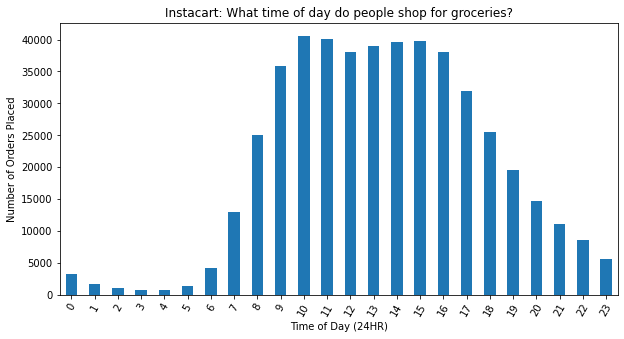

In [37]:
# viewing the data
display(orders['order_hour_of_day'].describe())

# saving total number of orders made during each hour of day into count variable 
counts_hod = orders['order_hour_of_day'].value_counts()

# setting up x-axis to represent hour of day frequency in chronological order
hour_of_day_freq = counts_hod.sort_index()

# plotting bar chart for 24hr time
hour_of_day_freq.plot(kind='bar', 
                      title='Instacart: What time of day do people shop for groceries?',
                      xlabel='Time of Day (24HR)',
                      ylabel='Number of Orders Placed',
                      rot=60,
                      figsize=[10, 5]
                     )
plt.show()

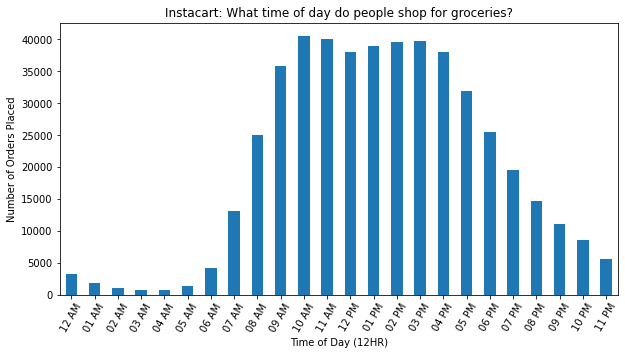

In [38]:
# converting from 24hr to 12hr time and formatting using strftime
hour_of_day_freq.index = pd.to_datetime(hour_of_day_freq.index, format='%H').strftime('%I %p')

# plotting bar chart for 12hr time
hour_of_day_freq.plot(kind='bar', 
                      title='Instacart: What time of day do people shop for groceries?',
                      xlabel='Time of Day (12HR)',
                      ylabel='Number of Orders Placed',
                      rot=60,
                      figsize=[10, 5]
                     )
plt.show()

<b>2.5 [A2]</b>

<b>Task: What time of day do people shop for groceries?</b>

Charts created above reflect the frequency of each hour of the day from when orders were placed and reflect 24hr and 12hr times, respectively.

The top 5 hours for shopping are 10AM, 11AM, 3PM, 2PM, 1PM. The average hour of the day when orders were placed is approximately 13.45. This suggests that, on average, orders are placed around mid-afternoon (i.e. between 1PM - 2PM). 25% of the orders were placed before 10AM; 50% of the orders were placed before 1PM; and 75% of the orders were placed before 4PM.

### [A3] What day of the week do people shop for groceries?

In [39]:
# viewing the data
orders['order_dow'].describe()
orders.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
310935,827544,35782,3,4,15,5.0
249698,1944284,91700,16,0,20,7.0
387292,1855696,87084,2,1,15,3.0
456490,34873,4018,3,6,12,30.0
340545,2897870,32092,23,3,9,1.0


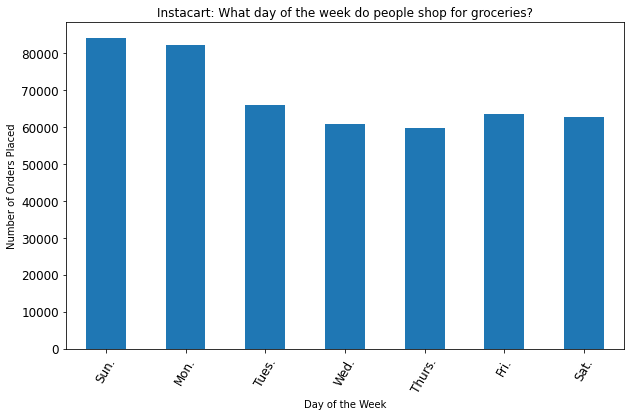

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

In [40]:
# saving total number of orders made on each day into variable to represent day of week frequency
counts_dow = orders['order_dow'].value_counts()

# setting up x-axis & resetting index 
order_dow_freq = counts_dow.sort_index()
order_dow_freq.index = ['Sun.','Mon.','Tues.','Wed.','Thurs.','Fri.','Sat.']

# setting up the bar chart
order_dow_freq.plot(x=order_dow_freq, 
                    kind='bar', 
                    title='Instacart: What day of the week do people shop for groceries?',
                    xlabel='Day of the Week',
                    ylabel='Number of Orders Placed',
                    rot=60,
                    figsize=[10, 6],
                    fontsize=12
                    )
plt.show()

orders['order_dow'].describe()

<b>2.6 [A3]</b>

<b>Task: What day of the week do people shop for groceries?</b>

The chart created above reflects the frequency of each day of the week from when orders were placed.

Assuming the scale corresponds to Sunday = 0 and Saturday = 6, the top 3 days for shopping are shop Sunday, Monday, & Tuesday. The average day of the week when orders were placed is approximately 2.78. A mean of 2.78 indicates on average, orders are placed between Tuesday and Wednesday. 25% of the orders were placed on or before Monday (1); 50% of the orders were placed on or before Wednesday (3); and 75% of the orders were placed on or before Friday (5).

### [A4] How long do people wait until placing another order?

In [41]:
# viewing the data 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [42]:
# viewing frequency of each time period (e.g., 1 day to 30 days) since last order
orders['days_since_prior_order'].value_counts()

30.0    51337
7.0     44577
0.0     38406
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: days_since_prior_order, dtype: int64

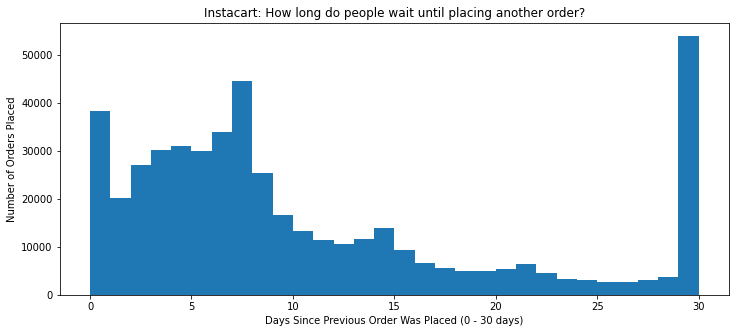

count    478952.000000
mean         10.433853
std           9.292153
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

In [43]:
# creating histogram 
orders['days_since_prior_order'].plot(kind='hist',
                                      title='Instacart: How long do people wait until placing another order?',
                                      bins=30,
                                      figsize = [12,5]
                                     ) 

plt.xlabel('Days Since Previous Order Was Placed (0 - 30 days)')
plt.ylabel('Number of Orders Placed')

plt.show()

display(orders['days_since_prior_order'].describe())

<b>2.7 [A4]</b>

<b>Task: How long do people wait until placing another order?</b>

The chart created above reflects the frequency of each time period (e.g., 1 day to 30 days) since the last order was placed by the customer.

The two most common waiting periods observed before customers place another order are approximately one month and one week. The average time people wait between orders is approximately 10 days. 25% of customers wait 4 days or less before placing another order; 50% of customers wait 7 days or less between orders; and 75% of customers wait 15 days or less before placing another order.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

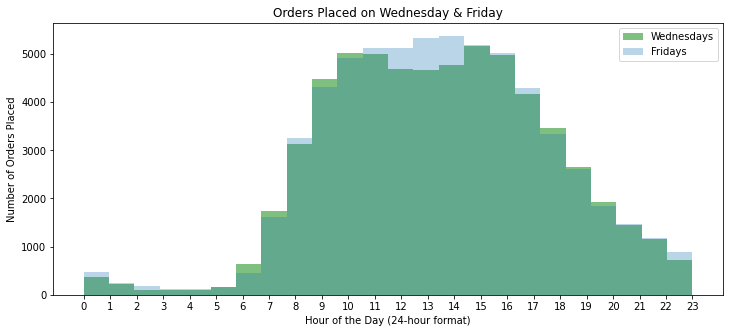

In [44]:
# viewing data
orders[(orders['order_dow'] == 3) | (orders['order_dow'] == 6)]

# Wednesday distribution for Order Hour of Day
orders[(orders['order_dow'] == 3)]['order_hour_of_day'].plot(kind='hist',
                                                             bins=24, color='green',
                                                             alpha=0.5)

# Saturday distribution for Order Hour of Day
orders[(orders['order_dow'] == 6)]['order_hour_of_day'].plot(kind='hist', 
                                                             title='Orders Placed on Wednesday & Friday',
                                                             bins =24,
                                                             alpha=0.3,
                                                             figsize=[12,5]
                                                            )

# Set x-axis label
plt.xlabel('Hour of the Day (24-hour format)')

# Set x-axis ticks and labels
plt.xticks(range(24))  # 0 to 23

# Set y-axis label
plt.ylabel('Number of Orders Placed')

# Legend
plt.legend(['Wednesdays', 'Fridays'])

plt.show()

<b>2.8 [B1]</b>

<b>Task: Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.</b>

There's a difference in number of orders placed on the two days. That is, Fridays see more orders placed between 10AM and 3PM compared to Wednesdays. But, for the most part, both days have a similar distribution.

### [B2] What's the distribution for the number of orders per customer?

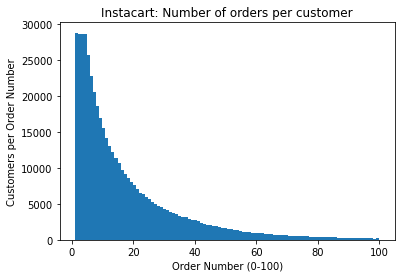

count    478952.000000
mean         17.157563
std          17.704457
min           1.000000
25%           5.000000
50%          11.000000
75%          23.000000
max         100.000000
Name: order_number, dtype: float64

In [45]:
# histogram for number of orders per customers
orders['order_number'].plot(kind='hist', 
                            bins=100, 
                            title='Instacart: Number of orders per customer') 
plt.xlabel('Order Number (0-100)')
plt.ylabel('Customers per Order Number')
plt.show()

display(orders['order_number'].describe())

<b>2.9 [B2]</b>
<b>Task: What's the distribution for the number of orders per customer?</b>

There's a little over 157k customers who have placed orders through Instacart. On average, each customer has placed approximately 17 orders. 25% of customers have placed 5 orders or fewer; 50% of customers have placed 11 orders or fewer; and 75% of customers have placed 23 orders or fewer.

### [B3] What are the top 20 popular products (display their id and name)?

In [46]:
# viewing applicable dfs
products.info()
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


In [47]:
# merging applicable dataframes based on the common column 'product_id' 
# to keep rows matched based on their 'product_id'
merged_df_product_id = pd.merge(order_products, products, on='product_id')

# creating a frequency count of each product, set in order of product with most to least counts,
# and resetting index
counts = merged_df_product_id['product_id'].value_counts().reset_index()
counts.columns = ['product_id', 'count']

In [48]:
# merging dataframes 'counts' with original dataframe 'products' on common colum 'product_id'
# to keep rows matched based on their 'product_id'
result_df = pd.merge(counts, products, on='product_id')

# filtering result_df dataframe by relevant columns and saving top 20 rows
top_twenty_df = result_df[['product_id', 'count', 'product_name']].head(20)

# resetting index to reflect Top 20 = 1-20, 1 = product with the most counts and 20 = products with the least
top_twenty_df.index = range(1,21)

In [49]:
# viewing top 20 products
print("Top 20 products are:   ")
display(top_twenty_df)

Top 20 products are:   


,product_id,count,product_name
1,24852,66050,banana
2,13176,53297,bag of organic bananas
3,21137,37039,organic strawberries
4,21903,33971,organic baby spinach
5,47209,29773,organic hass avocado
6,47766,24689,organic avocado
7,47626,21495,large lemon
8,16797,20018,strawberries
9,26209,19690,limes
10,27845,19600,organic whole milk


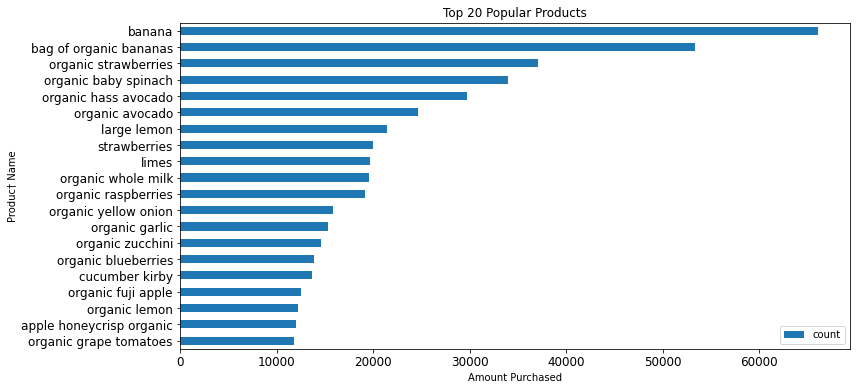

In [50]:
# creating a horizontal bar chart to show top 20 products with product name and counts
sort_top_twenty = top_twenty_df.sort_values(by='count')
sort_top_twenty.plot(x='product_name',
                     y= 'count',
                     kind='barh',
                     title='Top 20 Popular Products',
                     rot=0,
                     figsize=[12,6],
                     fontsize=12
                    )

plt.xlabel('Amount Purchased')
plt.ylabel('Produc† Name')

plt.show()

<b>2.10 [B3]</b>

<b>Task: What are the top 20 popular products (display their id and name)?</b>

The table and horizontal bar chart above displays the top 20 popular products by charting the frequency of each item purchased using the data from the <b>products</b> and <b>order_products</b> DataFrames. It was found that the number one item sold were bananas (non-organic and organic, respectively) followed by organic strawberries, organic spinach, and organic hass avocados. The number of organic items among the top 5 products could reveal some information on the preferences of customers who place orders in the Instacart app. 


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [51]:
# viewing info on relevant df
order_products.info()
print()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [52]:
# grouping cart items per order_id and applying max() method for a list of maximum values per order_id
cart_items = order_products.groupby('order_id')['add_to_cart_order'].max()

# merging order_id's with total instacart orders on common column 'order_id
# to keep rows matched based on order_id
merged_df_order_id = pd.merge(cart_items, orders, on='order_id')

# saving relevant columns into new dataframe
final_df = merged_df_order_id[['order_id', 'add_to_cart_order']]

# remove missing/placeholder values
final_df = final_df[(final_df['add_to_cart_order'] != 999)]

#viewing df
display(final_df)

,order_id,add_to_cart_order
0,4,13
1,9,15
2,11,5
3,19,3
4,20,8
...,...,...
450041,3421034,17
450042,3421053,9
450043,3421071,5
450044,3421077,4


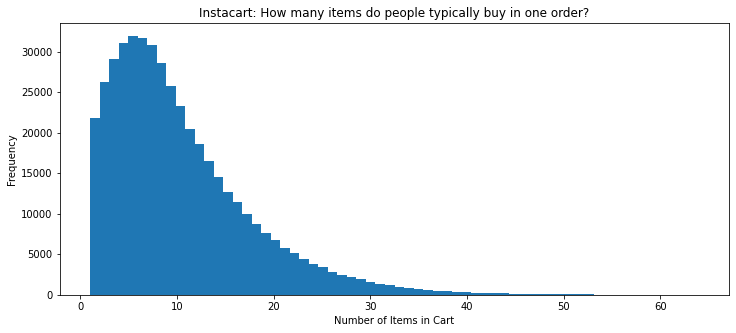

,order_id,add_to_cart_order
count,4.499760e+05,449976.000000
mean,1.710671e+06,10.088740
std,9.866434e+05,7.494232
min,4.000000e+00,1.000000
25%,8.576468e+05,5.000000
50%,1.711009e+06,8.000000
75%,2.563491e+06,14.000000
max,3.421079e+06,64.000000


In [53]:
# histogram for the number of items typically purchased in one order
final_df['add_to_cart_order'].plot(kind='hist', 
                                   bins=64, 
                                   title ='Instacart: How many items do people typically buy in one order?',
                                   figsize=[12,5])
plt.xlabel('Number of Items in Cart')
plt.show()

display(final_df.describe())

<b>2.11 [C1]</b>

<b>Task: How many items do people typically buy in one order?</b>

The histogram above displays the top number of items customers typically buy in one order by charting the frequency of each number of items in their cart within a set range (i.e., 1 - 64). On average, customers typically buy 10 or so items in one order. 25% of customers buy approx 5 items or fewer; 50% of customers buy approx 8 items or fewer; and 75% of customers buy approx 14 items or fewer.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?---

In [54]:
# refamilarizing with previous merged list
merged_df_product_id.info()

# isolating relevant columns and assigning to new df variable
new_df = merged_df_product_id[['product_id', 'reordered']]

# removing values where reordered = 0 
new_df = new_df[(new_df['reordered'] != 0)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   product_name       object
 5   aisle_id           int64 
 6   department_id      int64 
dtypes: int64(6), object(1)
memory usage: 277.4+ MB


In [55]:
# grouping by product_id column and applying the count() method 
# for a total count of product_ids that were reordered 
reorder_count = new_df.groupby(['product_id']).count()

# merging reorder count with original products dataframe on common col 'product_id' 
merged_reorder = pd.merge(reorder_count,products, on='product_id')

# sorting_values from most to least 
merged_reorder = merged_reorder.sort_values(by='reordered', ascending=False)

# filtering for relevant cols on the first 20 rows and assigning to top_twenty variable
top_twenty = merged_reorder[['product_id', 'reordered', 'product_name']].head(20)

# setting index to reflect 1-20, 1 = most reordered 20, least reordered 
top_twenty.index=range(1,21)

In [56]:
# viewing top twenty table 

print("Top 20 items that are reordered most frequently:   ")
display(top_twenty)

Top 20 items that are reordered most frequently:   


,product_id,reordered,product_name
1,24852,55763,banana
2,13176,44450,bag of organic bananas
3,21137,28639,organic strawberries
4,21903,26233,organic baby spinach
5,47209,23629,organic hass avocado
6,47766,18743,organic avocado
7,27845,16251,organic whole milk
8,47626,15044,large lemon
9,27966,14748,organic raspberries
10,16797,13945,strawberries


<b>2.12 [C2]</b>

<b>Task: What are the top 20 items that are reordered most frequently (display their names and product IDs)?</b>

The table above displays the top 20 that are reordered most frequently by displaying the frequency of each item reordered using the data from the <b>products</b> and <b>order_products</b> DataFrames.

# CONCLUSION

The project started with assessing for missing and duplicate values and taking the proper action necessary (i.e., dropping or replacing missing and duplicate values) to proceed with data analysis. I addressed several key questions and discovered ideal times, days, and products to center due to the frequency of purchases made. 

To summarize our findings, we found:

The top 5 hours for shopping are 10AM, 11AM, 3PM, 2PM, and 1PM, respectively. The average hour of the day when orders were placed is approximately 13.45 which suggests that, on average, orders are placed around mid-afternoon (i.e. between 1PM - 2PM). 

Functioning under the assumption that the Day of Week scale corresponds to Sunday = 0 and Saturday = 6, the top 3 days for shopping are Sunday, Monday, & Tuesday. The average day of the week when orders were placed is approximately 2.78 which suggests orders are, on average, placed between Tuesday and Wednesday.

The two most common waiting periods observed before customers place another order are approximately one month and one week. The average time people wait between orders is approximately 10 days.

When examining the distributions of the time of day for when orders were placed on Wednesday versus Friday, a difference in the number of orders placed on the two days was seen. That is, Fridays see more orders placed between 10AM and 3PM compared to Wednesdays. But, for the most part, both days have a similar distribution.

When examining the distributions of the number of orders placed per customer, it was found that of the 157k+ customers who have placed orders through Instacart, on average, each customer placed approximately 17 orders. 

When searching for the top 20 popular products sold through the Instacart app, it was found that the number one item sold were bananas (non-organic and organic, respectively) followed by organic strawberries, organic baby spinach, and organic hass avocados. The number of organic items among the top 5 products could reveal some information on the preferences of customers who place orders in the Instacart app. 

When investigating how many items people typically buy in one order, it was found that on average, customers typically buy 10 or so items in one order. 25% of customers buy approximately 5 items or fewer; 50% of customers buy approximately 8 items or fewer; and 75% of customers buy approximately 14 items or fewer.

Finally, when asking about the top 20 items that were reordered most frequently, it was found that top 5 items were the same top 5 among the top 20 popular products. 
